# Understanding the output of the resnet model
I'm trying to determine if the features extracted by your modified ResNet50V2 model are correlated with the continuous variable (qol index) that I'm predicting. This is a critical step in understanding my model's behavior and identifying potential issues.

In [1]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

/opt/emily/projects/measuring-quality-of-life-gauteng


In [2]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

from utils.r2_score import r_squared

2024-08-14 10:03:04.198707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 10:03:05.779171: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-08-14 10:03:05.779270: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-08-14 10:03:05.779284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2024-08-14 10:05:20.151789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 10:05:20.848392: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10777 MB memory:  -> device: 0, name: Tesla K40c, pci bus id: 0000:05:00.0, compute capability: 3.5


In [4]:
model = load_model("outputs/model/final.h5", custom_objects={"r_squared": r_squared})

In [5]:
model.summary()

Model: "ResNet50V2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [6]:
from utils.load_processed_data import load_dataset

training_data = load_dataset('train')
training_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry
0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.322..."
1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.352..."
2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.362..."
3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.372..."
4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.382..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.056..."
16378,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.066..."
16379,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.076..."
16380,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.086..."


In [7]:
training_data.shape[0]

16382

In [8]:
# import numpy as np
# from PIL import Image
# import os
# from tqdm import tqdm

# folder = "outputs/tiles"
# for index, row in tqdm(training_data.iterrows(), total=training_data.shape[0]):
#     img_location = os.path.join(folder, row["tile"])  # create full path to image
#     with Image.open(img_location) as img:  # open image with pillow

#         img = np.array(img)
#         img = img[:, :, :3]
#         img = np.expand_dims(img, axis=0)
#     predict = model.predict(img, verbose=0)
#     training_data.loc[index,"prediction"] = predict[0][0]

NB! The cell above is wrong because it did not preprocess the data the same way the data is processed before training. Instead should use create_generator which does preprocessing on image tile. It's also really slow.

In [9]:
from utils.keras_data_format import create_generator

train_generator = create_generator(training_data, 'qol_index')
train_generator

Found 16382 validated image filenames.


In [10]:
y_predictions_v2 = model.predict(train_generator)
y_predictions_v2

2024-08-14 10:06:16.325187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-08-14 10:06:16.601399: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2024-08-14 10:06:18.017399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:735] failed to allocate 6.53G (7007961088 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


512/512 [==============================] - 113s 213ms/step


array([[57.771214],
       [55.991146],
       [57.212563],
       ...,
       [53.025776],
       [57.639668],
       [57.252323]], dtype=float32)

In [11]:
len(y_predictions_v2)

16382

In [12]:
training_data["prediction"] = y_predictions_v2

In [13]:
training_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,prediction
0,0,2018-04-1179-868_00_05.tiff,2018,74804001,8.447754,2.686076,5.115498,6.728948,7.584857,4.870927,8.116613,62.041629,train,"POLYGON ((27.25708 -26.33281, 27.25708 -26.322...",57.771214
1,1,2018-04-1179-868_00_08.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.36234, 27.25708 -26.352...",55.991146
2,2,2018-04-1179-868_00_09.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.37219, 27.25708 -26.362...",57.212563
3,3,2018-04-1179-868_00_10.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.38203, 27.25708 -26.372...",58.282440
4,4,2018-04-1179-868_00_11.tiff,2018,74804012,8.430467,4.163434,5.253326,6.159752,7.595147,6.096639,6.007039,63.701792,train,"POLYGON ((27.25708 -26.39187, 27.25708 -26.382...",57.649227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,21857,2018-04-1184-870_15_10.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.06665, 28.30078 -26.056...",59.255508
16378,21858,2018-04-1184-870_15_11.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.07652, 28.30078 -26.066...",55.193516
16379,21859,2018-04-1184-870_15_12.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.08639, 28.30078 -26.076...",53.025776
16380,21860,2018-04-1184-870_15_13.tiff,2018,79700025,7.291546,3.690856,5.353527,6.474376,8.831612,5.049465,6.814553,61.696010,train,"POLYGON ((28.30078 -26.09625, 28.30078 -26.086...",57.639668


In [14]:
import os
os.makedirs("./temp-outputs/misc", exist_ok=True)
training_data.to_csv("./temp-outputs/misc/predictions-train.csv", index=False)

In [15]:
y_target = training_data["qol_index"]
y_pred = training_data["prediction"]

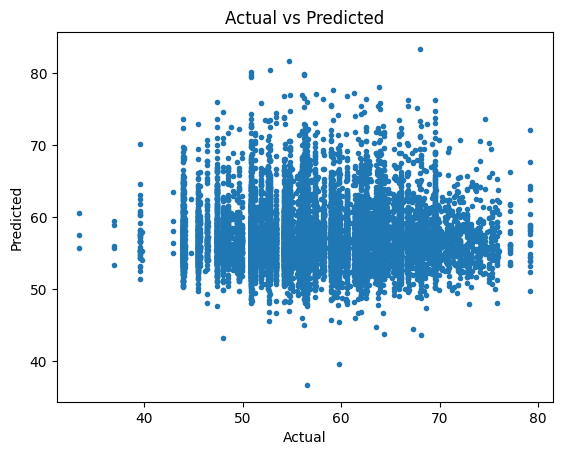

In [16]:
from matplotlib import pyplot as plt

plt.scatter(y_target, y_pred, marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import r_regression

# Assuming you have extracted features (X) and target variable (y)
features = np.array(y_pred).reshape(-1, 1)
target = np.array(y_target)

# Calculate Pearson correlation
corr_matrix = r_regression(features, target)

# Print correlations
print(corr_matrix)

[0.00526304]


In [21]:
# Above I did predictions for the model (ie total overall predictions)
# Now I am just going to get the output of the resnet alone
from keras import Model

model_output = model.get_layer("post_relu").output
resnet_model = Model(inputs=model.input, outputs=model_output)

# This gets 32 samples from the generator
batch = next(train_generator)
batch

(array([[[[0.3137255 , 0.27058825, 0.16078432],
          [0.32156864, 0.26666668, 0.15686275],
          [0.32941177, 0.27058825, 0.16470589],
          ...,
          [0.28235295, 0.26666668, 0.14901961],
          [0.2784314 , 0.25882354, 0.14117648],
          [0.27450982, 0.25490198, 0.14117648]],
 
         [[0.3137255 , 0.26666668, 0.15686275],
          [0.32941177, 0.27058825, 0.16470589],
          [0.34509805, 0.28235295, 0.17254902],
          ...,
          [0.28235295, 0.2627451 , 0.14117648],
          [0.28235295, 0.25882354, 0.14117648],
          [0.28235295, 0.25882354, 0.14901961]],
 
         [[0.3137255 , 0.2627451 , 0.15686275],
          [0.33333334, 0.27450982, 0.16862746],
          [0.34509805, 0.28627452, 0.17254902],
          ...,
          [0.2901961 , 0.2627451 , 0.14509805],
          [0.29411766, 0.25882354, 0.14901961],
          [0.29803923, 0.26666668, 0.16078432]],
 
         ...,
 
         [[0.38823533, 0.30588236, 0.19607845],
          [0.41960

In [23]:
img_tensors = batch[0]
img_tensors

array([[[[0.3137255 , 0.27058825, 0.16078432],
         [0.32156864, 0.26666668, 0.15686275],
         [0.32941177, 0.27058825, 0.16470589],
         ...,
         [0.28235295, 0.26666668, 0.14901961],
         [0.2784314 , 0.25882354, 0.14117648],
         [0.27450982, 0.25490198, 0.14117648]],

        [[0.3137255 , 0.26666668, 0.15686275],
         [0.32941177, 0.27058825, 0.16470589],
         [0.34509805, 0.28235295, 0.17254902],
         ...,
         [0.28235295, 0.2627451 , 0.14117648],
         [0.28235295, 0.25882354, 0.14117648],
         [0.28235295, 0.25882354, 0.14901961]],

        [[0.3137255 , 0.2627451 , 0.15686275],
         [0.33333334, 0.27450982, 0.16862746],
         [0.34509805, 0.28627452, 0.17254902],
         ...,
         [0.2901961 , 0.2627451 , 0.14509805],
         [0.29411766, 0.25882354, 0.14901961],
         [0.29803923, 0.26666668, 0.16078432]],

        ...,

        [[0.38823533, 0.30588236, 0.19607845],
         [0.41960788, 0.32941177, 0.21568629]

In [34]:
extracted_features = resnet_model.predict(img_tensors)
extracted_features = np.array(extracted_features)

np.shape(extracted_features)

1/1 [==============================] - 0s 53ms/step


(32, 8, 8, 2048)

In [58]:
flattened_features = extracted_features.flatten().reshape(len(batch[1]), 131072)
np.shape(flattened_features)

(32, 131072)

In [36]:
target_variable = batch[1]
target_variable = np.array(target_variable)
np.shape(target_variable)

(32,)

In [59]:
from sklearn.feature_selection import r_regression

# Calculate Pearson correlation
corr_matrix = r_regression(flattened_features, target)

# Print correlations
np.shape(corr_matrix)

(131072,)

In [60]:
corr_matrix

array([ 0.        ,  0.        ,  0.11397757, ...,  0.        ,
       -0.16270213,  0.06048411])

## TEST DATA

In [39]:
test_data = load_dataset('test')
test_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry
0,114,2018-04-1179-868_14_07.tiff,2018,74804018,9.400929,4.190993,5.749581,7.156771,7.957204,5.628133,6.607126,68.377560,test,"POLYGON ((27.41089 -26.35250, 27.41089 -26.342..."
1,125,2021-01-1186-874_00_00.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.33410, 28.48755 -25.324..."
2,126,2021-01-1186-874_00_01.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.34403, 28.48755 -25.334..."
3,127,2021-01-1186-874_00_02.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.35395, 28.48755 -25.344..."
4,128,2021-01-1186-874_00_03.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.36388, 28.48755 -25.353..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,21814,2018-04-1184-870_10_15.tiff,2018,79700017,9.398926,5.735027,6.108150,7.019717,8.630891,6.606600,6.297325,73.082994,test,"POLYGON ((28.24585 -26.11599, 28.24585 -26.106..."
5476,21819,2018-04-1184-870_11_08.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.25684 -26.04691, 28.25684 -26.037..."
5477,21827,2018-04-1184-870_12_08.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.26782 -26.04691, 28.26782 -26.037..."
5478,21828,2018-04-1184-870_12_09.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.26782 -26.05678, 28.26782 -26.046..."


In [40]:
test_data.shape[0]

5480

In [41]:
test_generator = create_generator(test_data, 'qol_index')
test_generator

Found 5480 validated image filenames.


In [42]:
y_test_predictions_v2 = model.predict(test_generator)
y_test_predictions_v2

172/172 [==============================] - 37s 215ms/step


array([[50.866245],
       [57.88012 ],
       [58.786045],
       ...,
       [56.615368],
       [55.526604],
       [59.38506 ]], dtype=float32)

In [43]:
test_data["prediction"] = y_test_predictions_v2
test_data

,index,tile,year,ward_code,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,split,geometry,prediction
0,114,2018-04-1179-868_14_07.tiff,2018,74804018,9.400929,4.190993,5.749581,7.156771,7.957204,5.628133,6.607126,68.377560,test,"POLYGON ((27.41089 -26.35250, 27.41089 -26.342...",50.866245
1,125,2021-01-1186-874_00_00.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.33410, 28.48755 -25.324...",57.880119
2,126,2021-01-1186-874_00_01.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.34403, 28.48755 -25.334...",58.786045
3,127,2021-01-1186-874_00_02.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.35395, 28.48755 -25.344...",56.276398
4,128,2021-01-1186-874_00_03.tiff,2021,79900099,5.639117,3.542202,3.816247,5.024410,8.484503,6.364435,7.118321,54.754593,test,"POLYGON ((28.48755 -25.36388, 28.48755 -25.353...",71.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,21814,2018-04-1184-870_10_15.tiff,2018,79700017,9.398926,5.735027,6.108150,7.019717,8.630891,6.606600,6.297325,73.082994,test,"POLYGON ((28.24585 -26.11599, 28.24585 -26.106...",53.111271
5476,21819,2018-04-1184-870_11_08.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.25684 -26.04691, 28.25684 -26.037...",58.005032
5477,21827,2018-04-1184-870_12_08.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.26782 -26.04691, 28.26782 -26.037...",56.615368
5478,21828,2018-04-1184-870_12_09.tiff,2018,79700091,9.397193,6.220249,5.698154,7.206157,8.195565,5.584033,7.068247,72.404072,test,"POLYGON ((28.26782 -26.05678, 28.26782 -26.046...",55.526604


In [44]:
os.makedirs("./temp-outputs/misc", exist_ok=True)
test_data.to_csv("./temp-outputs/misc/predictions-test.csv", index=False)

In [45]:
y_target_test = test_data["qol_index"]
y_pred_test = test_data["prediction"]

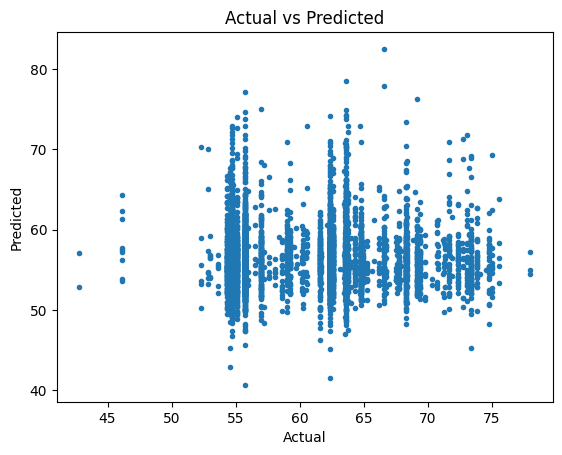

In [46]:
from matplotlib import pyplot as plt

plt.scatter(y_target_test, y_pred_test, marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()